In [1]:
import sys
import importlib
try:
    importlib.reload(sys.modules['experiments'])
except Exception as e:
    print(e)
from experiments import *


'experiments'


In [2]:
# pd.read_feather('hist_feather/KFS')

In [3]:
universe = prepare_universe()

In [4]:
m2 = universe.copy()[['date', 'mve_quintile']]
m2['count'] = 1
caption = 'Market Value of Equity Equal-size Quintiles'
display(pd.pivot_table(
    m2[m2.date >= 2010], 
    columns=['mve_quintile'],
    index='date',
    aggfunc="sum",
    margins=True)
        .style
        .set_caption(caption)
        .set_table_styles(styles)
        .format('{:.0f}')
       )

## Statistics on the Universe of Stocks

In [5]:
m2 = universe.copy()[['date', 'bm_quintile']]
m2['count'] = 1
caption = 'Book-to-Market Equal-size Quintiles'
display(pd.pivot_table(m2[m2.date >= 2010], columns=['bm_quintile'],
                       index='date',
                       aggfunc="sum",
                       margins=True)
        .style
        .set_caption(caption)
        .set_table_styles(styles)
        .format('{:.0f}')
       )

# Table 1
# Panel A
## Statistics on High BM only stocks

In [6]:


highbm = universe[universe.bm_quintile==4]
caption = "Financial and Return Characteristics of High Book-to-Market Firms"
highbm.describe(percentiles=[0.5]).rename({'50%':'median'}).drop(columns=['date']).T[['mean', 'std', 'median']].style.set_caption(caption).set_table_styles(styles).format('{:.2f}')

,mean,std,median
totalAssets,2853529976832.00,26283096408064.00,1096107456.00
mve,15131526144.00,884999061504.00,163597896.00
commonStockIssued,110287478784.00,5222397640704.00,0.00
roa,-5893.22,799024.12,0.01
operatingCashFlow,115898474496.00,2344225603584.00,33792500.00
book,21592784896.00,785528651776.00,18.57
price,1197.62,50378.11,7.08
bm,2273131776.00,117732769792.00,2.62
d_roa,1865040.50,255431216.00,0.00
d_lever,4259369.00,919609088.00,0.00


In [7]:
# verify the data cleaning process produces no rows with undefined book value
highbm.query('book == inf')

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,price_quintile,pscore_group,accrual


In [8]:
highbm.head()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,price_quintile,pscore_group,accrual
0,2014,1.87e+10,6.61e+09,0.0,-1.37e-02,8.42e+08,5.81e+01,36.25,1.60e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.0,4.51e-02,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,AA,4.0,2:high,2:large,2-7:med,0.06
1,2015,1.64e+10,4.18e+09,0.0,-4.92e-02,8.75e+08,5.18e+01,22.89,2.26e+00,-0.04,-4.60e-03,8.43e-04,-4.81e-03,-6.56e-02,0.0,5.33e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,AA,4.0,2:high,1:med,2-7:med,0.10
0,2022,1.51e+08,3.11e+06,0.0,-2.40e-02,-9.14e+05,7.12e+00,0.15,4.74e+01,-0.02,1.67e-03,-4.32e+00,-4.39e+08,7.68e-15,0.0,-6.05e-03,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,AACIW,4.0,0:low,0:small,2-7:med,0.02
1,2023,2.54e+07,5.34e+05,0.0,-3.63e-03,-1.86e+06,2.32e+00,0.07,3.15e+01,0.02,9.92e-02,-5.41e-02,1.82e+08,4.71e-11,0.0,-7.32e-02,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,AACIW,4.0,0:low,0:small,2-7:med,-0.07
0,1997,3.59e+08,6.14e-01,0.0,2.46e-01,7.72e+07,2.27e+10,61.41,3.69e+08,0.05,-7.26e-02,4.55e+00,0.00e+00,1.86e-01,1.0,2.15e-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,AAIC,4.0,0:low,2:large,2-7:med,-0.03


In [9]:
results = get_piotroski_experiment_results(highbm)
len(results)

1984 plo
1984 0 cannot run experiment
1984 phi
1984 0 cannot run experiment
1984 all
1984 ps_lo
1984 ps_hi
1985 plo
1985 0 cannot run experiment
1985 phi
1985 0 cannot run experiment
1985 all
1985 ps_lo
1985 ps_hi
1986 plo
1986 0 cannot run experiment
1986 phi
1986 0 cannot run experiment
1986 all
1986 ps_lo
1986 ps_hi
1987 plo
1987 0 cannot run experiment
1987 phi
1987 0 cannot run experiment
1987 all
1987 ps_lo
1987 ps_hi
1988 plo
1988 0 cannot run experiment
1988 phi
1988 0 cannot run experiment
1988 all
1988 ps_lo
1988 ps_hi
1989 plo
1989 phi
1989 all
1989 ps_lo
1989 ps_hi
1990 plo
1990 0 cannot run experiment
1990 phi
1990 all
1990 ps_lo
1990 ps_hi
1991 plo
1991 phi
1991 all
1991 ps_lo
1991 ps_hi
1992 plo
1992 0 cannot run experiment
1992 phi
1992 all
1992 ps_lo
1992 ps_hi
1993 plo
1993 phi
1993 all
1993 ps_lo
1993 ps_hi
1994 plo
1994 phi
1994 all
1994 ps_lo
1994 ps_hi
1995 plo
1995 phi
1995 all
1995 ps_lo
1995 ps_hi
1996 plo
1996 phi
1996 all
1996 ps_lo
1996 ps_hi
1997 plo
1997 p

187000

# Table 1
# Panel B
## Buy and Hold Returns from a High Book-to-Market Investment Strategy

In [10]:
results

,start,end,group,raw_ret,raw_ret_pos,raw_avg_ret,raw_avg_ret_pos,p0,p10,p25,p50,p75,p90,max,ma_ret,ma_ret_pos,ma_avg_ret,ma_avg_ret_pos,m_ret,|P|
0,1984-01-01,1985-01-01,all,2.52e-01,1.0,0.18,1.0,-7.30e-03,0.05,1.13e-01,2.01e-01,0.24,0.28,0.34,0.24,1.0,2.07e-01,1.0,8.03e-03,1
1,1984-01-01,1985-01-01,all,2.52e-01,1.0,0.18,1.0,-7.30e-03,0.05,1.13e-01,2.01e-01,0.24,0.28,0.34,0.24,1.0,2.07e-01,1.0,8.03e-03,1
2,1984-01-01,1985-01-01,all,2.52e-01,1.0,0.18,1.0,-7.30e-03,0.05,1.13e-01,2.01e-01,0.24,0.28,0.34,0.24,1.0,2.07e-01,1.0,8.03e-03,1
3,1984-01-01,1985-01-01,all,2.52e-01,1.0,0.18,1.0,-7.30e-03,0.05,1.13e-01,2.01e-01,0.24,0.28,0.34,0.24,1.0,2.07e-01,1.0,8.03e-03,1
4,1984-01-01,1985-01-01,all,2.52e-01,1.0,0.18,1.0,-7.30e-03,0.05,1.13e-01,2.01e-01,0.24,0.28,0.34,0.24,1.0,2.07e-01,1.0,8.03e-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186995,2023-01-01,2024-01-01,ps_hi,5.40e-02,1.0,0.02,1.0,-8.38e-02,-0.02,7.27e-04,2.99e-02,0.05,0.07,0.09,-0.18,0.0,-8.70e-02,0.0,2.29e-01,204
186996,2023-01-01,2024-01-01,ps_hi,-2.45e-02,0.0,0.10,1.0,-8.64e-02,-0.01,3.01e-02,5.46e-02,0.14,0.28,0.46,-0.25,0.0,-1.12e-02,0.0,2.29e-01,204
186997,2023-01-01,2024-01-01,ps_hi,-1.42e-01,0.0,0.04,1.0,-1.81e-01,-0.08,-4.47e-02,4.03e-02,0.12,0.17,0.22,-0.37,0.0,-6.88e-02,0.0,2.29e-01,204
186998,2023-01-01,2024-01-01,ps_hi,3.99e-03,1.0,0.02,1.0,-1.08e-01,-0.08,-2.88e-02,9.28e-04,0.08,0.12,0.23,-0.23,0.0,-9.01e-02,0.0,2.29e-01,204


In [11]:
_df = results.copy()
_df = _df.rename(columns={'ma_ret':'Market-Adjusted', 'raw_ret': 'Raw', 'm_ret': 'Market'})
_res = pd.melt(_df, id_vars=['start', 'end', 'group'], value_vars=['Raw', 'Market-Adjusted'], var_name='return_type')
_res['sample'] = pd.to_datetime(_res.start).dt.year.apply(lambda x: ' Before 2000' if x < 2000 else 'After 2000')
caption = f"Buy-and-Hold Returns from a High Book-to-Market Investment Strategy: <br> Raw Returns and Market-Adjusted Returns"
display(
    pd.pivot_table(
    data=_res, 
    index=['group'],
    columns=['return_type'],
    values='value',
    aggfunc=['mean', p10, p25, p50, p75, p90, pos], 
    )
    .reorder_levels([1, 0], axis=1)
    .sort_index(axis=1)
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
caption = f"Buy-and-Hold Returns from a High Book-to-Market Investment Strategy: <br> Raw Returns and Market-Adjusted Returns <br> In-Sample and Out-of-Sample"
display(
    pd.pivot_table(
    data=_res, 
    index=['group'],
    columns=['return_type', 'sample'],
    values='value',
    aggfunc=['mean', p50, pos], 
    )
    .reorder_levels([2, 1, 0], axis=1)
    .sort_index(axis=1)
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)
    
# for value, name in zip(['raw_ret', 'ma_ret'], ['Raw Returns', 'Market-Adjusted']):
#     caption = f"Buy-and-Hold Returns from a High Book-to-Market Investment Strategy: <br> {name}"
    
#     display(
#         pd.concat([
#             results.groupby('group')[value].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9], ).drop(columns=['min', 'std', 'max']),
#             results.groupby('group')[value+"_pos"].mean()
#         ], axis=1)
#         .style
#         .set_caption(caption)
#         .set_table_styles(styles).format('{:.2f}')
#    )


# Piotroski Statistical T-test Results

In [12]:
tests = run_piotroski_tests(results)

C:\Users\lemmonw\anaconda3-2\envs\yahooquery\lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


(640,)


In [13]:
display(tests[tests.start=='--']
 .style
 .hide(axis='index')
 .set_caption("Aggregate High BM Test Statistics")
 .set_table_styles(styles)
 #.format('{:.2f}')
);


start,end,test,n,mu1,mu2,t-statistic,p-value
--,--,high - low,640,0.088459,0.021481,1.526216,0.127203
--,--,high - all,640,0.063053,0.021481,1.020035,0.307905


# Augment with individual returns

In [14]:
highbm_indreturns = highbm.copy()
highbm_indreturns[return_vector_field_names] = highbm_indreturns.apply(lambda x: computeReturns(x, f'{x.date}-01-01', f'{x.date+1}-01-01'), axis=1, result_type='expand')
highbm_indreturns['n'] = 1.0
highbm_indreturns.head()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,price_quintile,pscore_group,accrual,raw_ret,raw_ret_pos,raw_avg_ret,raw_avg_ret_pos,p0,p10,p25,p50,p75,p90,max,ma_ret,ma_ret_pos,ma_avg_ret,ma_avg_ret_pos,m_ret,n
0,2014,1.87e+10,6.61e+09,0.0,-1.37e-02,8.42e+08,5.81e+01,36.25,1.60e+00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.0,4.51e-02,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,AA,4.0,2:high,2:large,2-7:med,0.06,0.50,1.0,3.65e-01,1.0,-0.05,0.08,0.19,0.39,0.55,6.00e-01,0.67,0.38,1.0,0.32,1.0,1.26e-01,1.0
1,2015,1.64e+10,4.18e+09,0.0,-4.92e-02,8.75e+08,5.18e+01,22.89,2.26e+00,-0.04,-4.60e-03,8.43e-04,-4.81e-03,-6.56e-02,0.0,5.33e-02,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,AA,4.0,2:high,1:med,2-7:med,0.10,-0.36,0.0,-2.56e-01,0.0,-0.50,-0.42,-0.40,-0.30,-0.14,-7.17e-03,0.08,-0.36,0.0,-0.26,0.0,2.17e-03,1.0
0,2022,1.51e+08,3.11e+06,0.0,-2.40e-02,-9.14e+05,7.12e+00,0.15,4.74e+01,-0.02,1.67e-03,-4.32e+00,-4.39e+08,7.68e-15,0.0,-6.05e-03,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,AACIW,4.0,0:low,0:small,2-7:med,0.02,-0.94,0.0,-6.25e-01,0.0,-0.97,-0.94,-0.77,-0.64,-0.46,-3.92e-01,0.06,-0.75,0.0,-0.49,0.0,-1.92e-01,1.0
1,2023,2.54e+07,5.34e+05,0.0,-3.63e-03,-1.86e+06,2.32e+00,0.07,3.15e+01,0.02,9.92e-02,-5.41e-02,1.82e+08,4.71e-11,0.0,-7.32e-02,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,AACIW,4.0,0:low,0:small,2-7:med,-0.07,-0.32,0.0,1.24e+00,1.0,-0.52,0.00,0.00,1.26,2.23,2.55e+00,3.68,-0.55,0.0,1.13,1.0,2.29e-01,1.0
0,1997,3.59e+08,6.14e-01,0.0,2.46e-01,7.72e+07,2.27e+10,61.41,3.69e+08,0.05,-7.26e-02,4.55e+00,0.00e+00,1.86e-01,1.0,2.15e-01,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,AAIC,4.0,0:low,2:large,2-7:med,-0.03,-0.07,0.0,-6.36e-04,0.0,-0.07,0.00,0.00,0.00,0.00,0.00e+00,0.00,-0.38,0.0,-0.18,0.0,3.09e-01,1.0


# Table 2
## Spearman Correlation Analysis between One-Year Market-Adjusted Returns, the Nine Fundamental Signals, and the Composite Signal for High book-to-Market Firms

In [15]:
corr_columns = [ 'raw_ret', 'ma_ret', 'roa', 'd_roa', 'd_margin', 'cf', 'd_liquid', 'd_lever', 'd_turn', 'accrual', 'eq_offer', 'pscore']
corr = highbm_indreturns[corr_columns].corr(method='spearman', min_periods=1, numeric_only=True)
corr
caption = "Spearman Correlation Analysis between One-Year Market-Adjusted Returns, the Nine Fundamental Signals, and the Composite Signal for High book-to-Market Firms"
corr.style.set_caption(caption).set_table_styles(styles).format('{:.2f}')

,raw_ret,ma_ret,roa,d_roa,d_margin,cf,d_liquid,d_lever,d_turn,accrual,eq_offer,pscore
raw_ret,1.00,0.88,0.33,0.22,0.11,0.22,0.05,-0.13,0.11,-0.11,0.03,0.19
ma_ret,0.88,1.00,0.31,0.19,0.10,0.23,0.04,-0.11,0.11,-0.09,0.05,0.21
roa,0.33,0.31,1.00,0.35,0.09,0.48,0.02,-0.10,0.11,-0.40,0.11,0.29
d_roa,0.22,0.19,0.35,1.00,0.22,0.04,0.06,-0.18,0.31,-0.26,-0.00,0.18
d_margin,0.11,0.10,0.09,0.22,1.00,0.04,0.06,-0.08,0.09,-0.04,0.01,0.27
cf,0.22,0.23,0.48,0.04,0.04,1.00,0.04,-0.11,0.04,0.43,0.09,0.47
d_liquid,0.05,0.04,0.02,0.06,0.06,0.04,1.00,-0.17,-0.05,0.01,-0.06,0.20
d_lever,-0.13,-0.11,-0.10,-0.18,-0.08,-0.11,-0.17,1.00,-0.06,-0.03,0.07,0.11
d_turn,0.11,0.11,0.11,0.31,0.09,0.04,-0.05,-0.06,1.00,-0.05,0.02,0.51
accrual,-0.11,-0.09,-0.40,-0.26,-0.04,0.43,0.01,-0.03,-0.05,1.00,-0.06,0.22


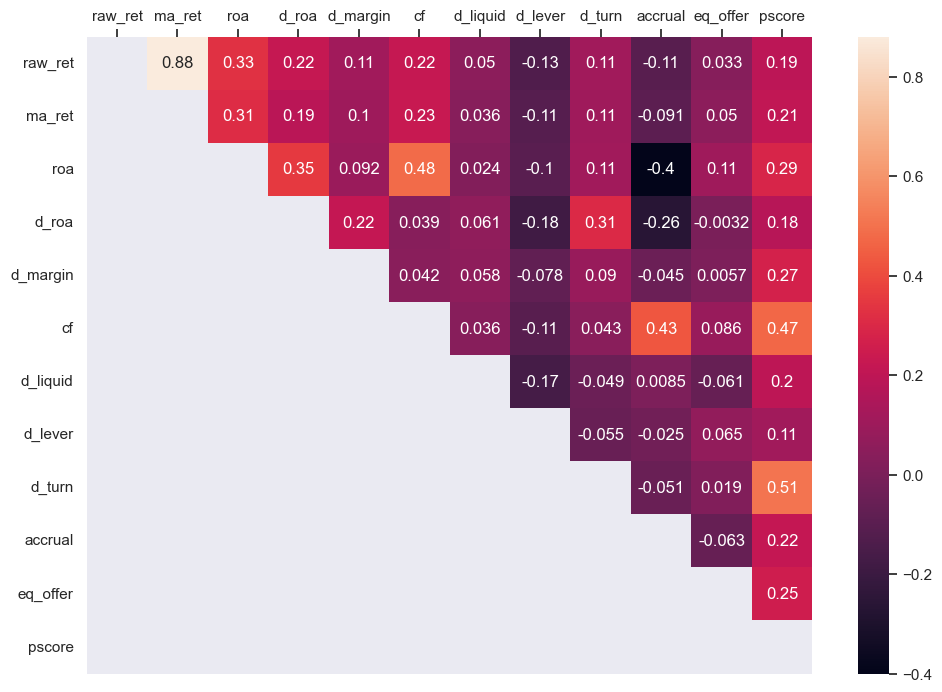

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
mask = np.tril(np.ones_like(corr))
ax = sns.heatmap(corr, annot=True, mask=mask)
ax.grid(False)
plt.yticks(rotation=0)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.show()

# Table 3
## Buy-and-Hold Returns to a Value Investment Strategy based on Fundamental Signals

In [17]:
for value, name in zip(['raw_ret', 'ma_ret'], ['Raw Returns', 'Market-Adjusted Returns']):
    for groupby in ['pscore', 'pscore_group']:
        caption = f"Buy-and-Hold Returns to a Value Investment Strategy based on Fundamental Signals: <br> {name}"
        display(
            pd.concat([
                highbm_indreturns
                .groupby(groupby)[value]
                .describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).drop(columns=['min', 'std', 'max']),
                highbm_indreturns.groupby(groupby)[value+"_pos"].mean()
            ], axis=1)
            .style
            .set_caption(caption)
            .set_table_styles(styles).format('{:.2f}')
       )


,count,mean,10%,25%,50%,75%,90%,raw_ret_pos
pscore,,,,,,,,
0.000000,297.00,-0.14,-0.77,-0.50,-0.02,0.03,0.18,0.40
1.000000,625.00,-0.05,-0.83,-0.58,-0.14,0.03,0.32,0.33
2.000000,1329.00,-0.15,-0.84,-0.60,-0.13,0.07,0.37,0.36
3.000000,2615.00,0.01,-0.72,-0.38,-0.05,0.14,0.35,0.45
4.000000,3559.00,-0.01,-0.63,-0.30,-0.02,0.17,0.43,0.47
5.000000,3725.00,0.04,-0.55,-0.23,0.01,0.21,0.47,0.52
6.000000,3284.00,0.12,-0.45,-0.17,0.05,0.25,0.55,0.56
7.000000,2015.00,0.12,-0.38,-0.15,0.06,0.26,0.56,0.58
8.000000,766.00,0.13,-0.36,-0.13,0.06,0.27,0.57,0.59


,count,mean,10%,25%,50%,75%,90%,raw_ret_pos
pscore_group,,,,,,,,
0-1:lo,922.00,-0.08,-0.82,-0.55,-0.10,0.03,0.28,0.35
2-7:med,16527.00,0.04,-0.60,-0.26,0.00,0.20,0.46,0.50
8-9:hi,851.00,0.14,-0.36,-0.13,0.07,0.27,0.59,0.59


,count,mean,10%,25%,50%,75%,90%,ma_ret_pos
pscore,,,,,,,,
0.000000,297.00,-0.18,-0.71,-0.48,-0.28,0.04,0.23,0.27
1.000000,625.00,-0.15,-0.79,-0.60,-0.29,-0.09,0.23,0.19
2.000000,1329.00,-0.23,-0.79,-0.61,-0.28,-0.01,0.24,0.24
3.000000,2615.00,-0.09,-0.72,-0.45,-0.16,0.02,0.24,0.28
4.000000,3559.00,-0.10,-0.64,-0.38,-0.13,0.06,0.32,0.32
5.000000,3725.00,-0.05,-0.57,-0.31,-0.09,0.09,0.34,0.36
6.000000,3284.00,0.02,-0.48,-0.26,-0.07,0.13,0.45,0.41
7.000000,2015.00,0.03,-0.42,-0.22,-0.05,0.16,0.46,0.44
8.000000,766.00,0.03,-0.41,-0.22,-0.03,0.16,0.44,0.46


,count,mean,10%,25%,50%,75%,90%,ma_ret_pos
pscore_group,,,,,,,,
0-1:lo,922.00,-0.16,-0.76,-0.56,-0.28,-0.07,0.23,0.22
2-7:med,16527.00,-0.06,-0.62,-0.34,-0.11,0.09,0.34,0.35
8-9:hi,851.00,0.04,-0.42,-0.21,-0.03,0.17,0.48,0.47


# Table 4
## One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by Size Partition

In [18]:
results.head()

,start,end,group,raw_ret,raw_ret_pos,raw_avg_ret,raw_avg_ret_pos,p0,p10,p25,p50,p75,p90,max,ma_ret,ma_ret_pos,ma_avg_ret,ma_avg_ret_pos,m_ret,|P|
0,1984-01-01,1985-01-01,all,0.25,1.0,0.18,1.0,-7.30e-03,0.05,0.11,0.2,0.24,0.28,0.34,0.24,1.0,0.21,1.0,8.03e-03,1
1,1984-01-01,1985-01-01,all,0.25,1.0,0.18,1.0,-7.30e-03,0.05,0.11,0.2,0.24,0.28,0.34,0.24,1.0,0.21,1.0,8.03e-03,1
2,1984-01-01,1985-01-01,all,0.25,1.0,0.18,1.0,-7.30e-03,0.05,0.11,0.2,0.24,0.28,0.34,0.24,1.0,0.21,1.0,8.03e-03,1
3,1984-01-01,1985-01-01,all,0.25,1.0,0.18,1.0,-7.30e-03,0.05,0.11,0.2,0.24,0.28,0.34,0.24,1.0,0.21,1.0,8.03e-03,1
4,1984-01-01,1985-01-01,all,0.25,1.0,0.18,1.0,-7.30e-03,0.05,0.11,0.2,0.24,0.28,0.34,0.24,1.0,0.21,1.0,8.03e-03,1


In [19]:
caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by Size Partition"
for groupby in ['pscore', 'pscore_group']:
    display(
        pd.pivot_table(
        data=highbm_indreturns, 
        index=[groupby], 
        columns=['mve_quintile'], 
        aggfunc=['mean', 'median', 'count'], 
        values='ma_ret', margins=True)
        .reorder_levels([1, 0], axis=1)
        .sort_index(axis=1)
        .style
        .set_caption(caption)
        .set_table_styles(styles).format('{:.2f}')
    )

# Table 5
## One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by Share Price

In [20]:
caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by Share Price"
for groupby in ['pscore_group']:
    display(
        pd.pivot_table(
        data=highbm_indreturns, 
        index=[groupby], 
        columns=['price_quintile'], 
        aggfunc=['mean', 'median', 'count'], 
        values='ma_ret', margins=True)
        .reorder_levels([1, 0], axis=1)
        .sort_index(axis=1)
        .style
        .set_caption(caption)
        .set_table_styles(styles).format('{:.2f}')
    )